In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import numpy as np
import itertools
from sklearn.linear_model import PassiveAggressiveClassifier
import nltk
from tqdm.notebook import tqdm_notebook
import time
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
df = pd.read_csv("drive/MyDrive/datasets/fake-news/train.csv")

In [4]:
print(df.shape)
df.head()

(20800, 5)


,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
X = df.drop('label',axis=1)
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [6]:
y = df['label']
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [7]:
print(df.isnull().sum())
df=df.dropna()
df.head(10)

id           0
title      558
author    1957
text        39
label        0
dtype: int64


,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [8]:
df1 = df.copy()
df1.reset_index(inplace=True)
df1.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [ ]:
# from nltk.stem import WordNetLemmatizer
# lemmatizer = WordNetLemmatizer()
# corpus1 = []
# for i in range(0, len(df1)):
#     temp = re.sub('[^a-zA-Z]', ' ', df1['text'][i])
#     temp = temp.lower()
#     temp = temp.split()
#     temp = [lemmatizer.lemmatize(word) for word in temp if not word in stopwords.words('english')]
#     temp = ' '.join(temp)
#     corpus1.append(temp)

In [9]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(df1)):
    review = re.sub('[^a-zA-Z]', ' ', df1['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [10]:
len(corpus)

18285

In [11]:
tf_idf = TfidfVectorizer(max_features = 5000, ngram_range = (1,3))
X = tf_idf.fit_transform(corpus).toarray()

In [12]:
X.shape

(18285, 5000)

In [13]:
y = df1['label']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
tf_idf.get_feature_names()[:20]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aaron',
 'abandon',
 'abc',
 'abe',
 'abedin',
 'abil',
 'abl',
 'abort',
 'abroad',
 'absenc',
 'absolut',
 'absorb',
 'absurd',
 'abu',
 'abus',
 'academ',
 'academi',
 'acceler',
 'accept',
 'access']

In [17]:
classifier = MultinomialNB()
classifier1 = MultinomialNB(alpha=0.1)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

cm = metrics.confusion_matrix(y_test, pred, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['FAKE', 'REAL'])
disp.plot()
plt.show()

accuracy:   0.899


In [ ]:
previous_score=0
score_set = []
for alpha in np.arange(0,1.1,0.1):
    sub_classifier = MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred = sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score > previous_score:
        classifier1 = sub_classifier
    print("Alpha: {}, Score : {}".format(alpha, score))

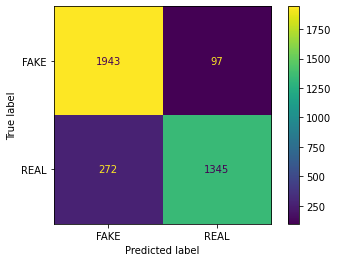

In [66]:
cm = metrics.confusion_matrix(y_test, y_pred, labels=classifier1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['FAKE', 'REAL'])
disp.plot()
plt.show()

In [64]:
from sklearn.linear_model import PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(n_iter_no_change=50)

accuracy:   0.943


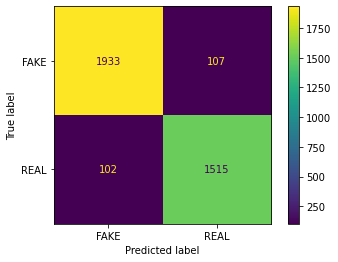

In [65]:
pac.fit(X_train, y_train)
pred = pac.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=pac.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['FAKE', 'REAL'])
disp.plot()
plt.show()

**Most real**

In [ ]:
sorted(zip(classifier.coef_[0], tf_idf.get_feature_names()), reverse=True)[:20]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


[(-5.380515703564519, 'clinton'),
 (-5.501437481172409, 'trump'),
 (-5.680864709392283, 'hillari'),
 (-5.9111508407916284, 'us'),
 (-5.937293776266323, 'elect'),
 (-6.1431447993194785, 'peopl'),
 (-6.169578481543377, 'vote'),
 (-6.175984792005568, 'state'),
 (-6.189961121792867, 'email'),
 (-6.225248988310173, 'one'),
 (-6.289233493405567, 'fbi'),
 (-6.303850451032479, 'hillari clinton'),
 (-6.307336081911, 'would'),
 (-6.326324016893827, 'like'),
 (-6.377532710098753, 'american'),
 (-6.380655469504762, 'time'),
 (-6.409183903456851, 'war'),
 (-6.415444473992961, 'world'),
 (-6.444906838713494, 'year'),
 (-6.456095874838207, 'octob')]

**Most fake**

In [ ]:
sorted(zip(classifier.coef_[0], tf_idf.get_feature_names()))[:20]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


[(-11.057368305366452, 'brief post'),
 (-11.057368305366452, 'follow pam'),
 (-11.057368305366452, 'follow pam key'),
 (-11.057368305366452, 'gorsuch'),
 (-11.057368305366452, 'judg gorsuch'),
 (-11.057368305366452, 'key twitter'),
 (-11.057368305366452, 'key twitter pamkeynen'),
 (-11.057368305366452, 'morn brief'),
 (-11.057368305366452, 'mr bannon'),
 (-11.057368305366452, 'mr castro'),
 (-11.057368305366452, 'mr christi'),
 (-11.057368305366452, 'mr cruz'),
 (-11.057368305366452, 'mr de'),
 (-11.057368305366452, 'mr kushner'),
 (-11.057368305366452, 'mr roof'),
 (-11.057368305366452, 'mr sander'),
 (-11.057368305366452, 'mr scott'),
 (-11.057368305366452, 'mr session'),
 (-11.057368305366452, 'mr spicer'),
 (-11.057368305366452, 'mr xi')]